# ANALYSIS OF STUDENTS' SPENDINGS AT CTPEA ON A RANDOM DAY OF CLASS

By __Grégory PINCHINAT__, _Data Scientist / Statistician / Economist_

Monday, August 2, 2020

---

### _Table of Contents_

### INTRODUCTION

#### _Background_ 
In Third Year of studies at _Centre de Techniques de Planification et d'Economie Appliquée (CTPEA)_, the Statistician class of 2014-2018 had just had their first homework, where they had to come up with a problem to solve using data and Econometrics software. Doing so was kind of challenging because they had just finished their Course of _Fundamentals of Econometrics (Econometrics 1)_ and had a broad introduction to their Course of _Survey Methodology_.

Of course, they had already passed several Math courses, of which two of _Probability (1 & 2)_, one of _Descriptive Statistics_ and one of _Inferential Statistics_. But it still would not be an easy task to them, since they were just starting with some practices of Data Science. The first thing they did was conducting a little survey (from March 22 to 31, 2017) inside the University, questioning students about many variables they thought would be related to their daily spendings.

Then they would dive deep into the Analysis but still with an eye of an Econometrician. At the time, they didn't have much knowledge in Data Science in order to go further than where the p-values allowed them to go, while there were a lot of non-parametric approaches out there that could've been as useful. The same data is now being used with the same purpose, but with a different approach and an updating of the values so they can be applied to to-day's situation.

#### _Interest_
Being a student is not an easy thing. Above all if you come from a modest family, and you're attending classes at a public university. Giving an overview of the economic lifestyle of a student on a random class day is interesting because with such an information, any philanthropist may decide to give an economic help to the students who would be the most in need and/or would deserve such a sponsorship and/or would be ready to accept it.

Even students with money might want to have free money. Their parents would certainly be relieved to spend less on their kids' daily pocket money in a country where [the GDP per capita is less than $800](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?locations=HT). Are the students spending too much? Aren't they spending enough? Food is necessary for their focus and their daily energy reserve in order to keep a good performance. Do they spend enough on food? Do the spendings vary across demographic characteristics like sex, age, etc...?

#### _Objective_
Our objective here is to make a more in-deep analysis of students' spendings at CTPEA as of 2017, including variables that were not accounted for although they were part of the study. This analysis may also be replicated for any faculty in the _State University of Haiti (UEH)_, or for the whole University or for any University or even for new data from CTPEA, since prices may be different because of CTPEA's new location and because of the inflation.

### RESEARCH QUESTION

_How do CTPEA's students spend on a random day of class?_

### HYPOTHESES
+ The **Daily spendings* of a student at CTPEA depends on his spendings on **Transportation, Food** and on the amount of **Pocket Money** they have available on the very day.


+ The **Duration of sleep** the night before may cause students to spend more on the current day of class, because they may need more Food to compensate a lack of sleep and/or may have no choice but to pay for transportation instead of walking to school, and/or to pay for faster transportation (taxi-moto, which cost more than regular taxi cabs). 


+ The **Hours spent at the University** (`school_hours`) may also impact on the daily spendings because it is assumed that the shorter a student stay in classes, the less they will need to spend on food or on anything else.


+ Some _Demographics_ are suspected to have an influence on the amount of daily spendings, whether high or low, as assumed. 

### DATA SOURCES
The Data that will be used to carry the analyses have all been obtained from a survey prepared and conducted by __Grégory Pinchinat__ with his co-researchers at the CTPEA (**Davidson ADRIEN, _Statistician_** / __Heud Rothschild Lubson BAPTISTE, *Quantitative Economist*__ / __John Boby MESADIEU, *Statistician*__). The responses all come from CTPEA Students from classes 2013-2016 (Seniors), 2014-2018 (Juniors), 2015-2019 (Sophomore) and 2016-2020 (Rookie/Freshmen). 

A link was published on all closed social networks where those students are reunited. And when necessary, the researchers would go to the classes with a mobile device in order to interrogate the potential respondents. No a priori clustering was made, the Survey methodology was that of a simple random sample. A copy of the Google Form used as questionnaire is attached to this document as a guide to understanding the dataset and the context of study.

The data is trustworthy because all survey methods were followed scrupulously.

### I. Data Cleaning

Let's start importing necessary packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

In [2]:
# Data loading
df = pd.read_excel('datasets/base-brute.xlsx')
df.head()

,Timestamp,Email Address,"O total, di nou konbyen kòb ou te depanse (an goud) jodi a?",Konbyen kòb (an goud) ou te gen nan pòch ou lè w t'ap soti lakay ou maten an?,Pandan konbyen èdtan w te dòmi yèswa a?,"Ant lè w rive lekòl la jiska lè w’ap soti pou w al lakay ou, di nou konbyen tan w estime ou pase lekòl la jodi a.","Si w ap konte kòb (an goud) ou peye pou transpò pou w vin lekòl la jodi a, ak kòb (an goud) ou peye nan pita pou w antre lakay ou, sa t'ap fè konbyen antou?",Konbyen kòb (an goud) ou depanse pou manje ak bwè jodi a?,Prénom,Nom,Année,Age,Sexe,Lieu de naissance,Quelle est votre source de revenu?,Statut matrimonial,"Idantite w pa relye ak ankèt la nan okenn fason. Eske w te alèz pou w reponn tout kesyon nou yo ak franchiz? Sinon, ki kesyon ki te jennen w e poukisa?",Finalman... Chwazi nivo satisfaksyon w.
0,2017-03-22 17:24:06.502,reggy.rcr@gmail.com,205,500,8.0,7.0,15,190,NaN,NaN,2ème année,20.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire,NaN,4.0
1,2017-03-22 17:38:19.945,vjuniorrydch@gmail.com,100,100,4.3,6.0,10,50,NaN,NaN,1ère année,19.0,Homme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire,"Wi, Mwen te alez",3.0
2,2017-03-22 17:56:49.031,louisevie30@gmail.com,370,1025,4.0,4.0,25,50,NaN,NaN,2ème année,20.0,Femme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire,NaN,4.0
3,2017-03-23 16:03:27.343,ydrac6731@gmail.com,250,500,5.0,7.0,40,200,NaN,NaN,2ème année,20.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire,NaN,4.0
4,2017-03-23 16:15:04.036,micaljean96@gmail.com,150,200,5.0,7.0,40,100,NaN,NaN,3ème année - Eco-Plan,22.0,Femme,Autre ville ou zone de province en Haiti,NaN,Célibataire,Wi,4.0


In [3]:
df.drop(df.columns[:2].append(df.columns[-2:]).append(df.columns[-10:-8]), axis=1, inplace=True)

In [4]:
df.head()

,"O total, di nou konbyen kòb ou te depanse (an goud) jodi a?",Konbyen kòb (an goud) ou te gen nan pòch ou lè w t'ap soti lakay ou maten an?,Pandan konbyen èdtan w te dòmi yèswa a?,"Ant lè w rive lekòl la jiska lè w’ap soti pou w al lakay ou, di nou konbyen tan w estime ou pase lekòl la jodi a.","Si w ap konte kòb (an goud) ou peye pou transpò pou w vin lekòl la jodi a, ak kòb (an goud) ou peye nan pita pou w antre lakay ou, sa t'ap fè konbyen antou?",Konbyen kòb (an goud) ou depanse pou manje ak bwè jodi a?,Année,Age,Sexe,Lieu de naissance,Quelle est votre source de revenu?,Statut matrimonial
0,205,500,8.0,7.0,15,190,2ème année,20.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire
1,100,100,4.3,6.0,10,50,1ère année,19.0,Homme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire
2,370,1025,4.0,4.0,25,50,2ème année,20.0,Femme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire
3,250,500,5.0,7.0,40,200,2ème année,20.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire
4,150,200,5.0,7.0,40,100,3ème année - Eco-Plan,22.0,Femme,Autre ville ou zone de province en Haiti,NaN,Célibataire


In [5]:
# Rename columns to shorter and more explicit names
df.rename(columns={"O total, di nou konbyen kòb ou te depanse (an goud) jodi a?": 'spending_on_day', 
                   "Konbyen kòb (an goud) ou te gen nan pòch ou lè w t'ap soti lakay ou maten an?": 'pocket_money', 
                   "Pandan konbyen èdtan w te dòmi yèswa a?": 'sleep_hours', 
                   "Ant lè w rive lekòl la jiska lè w’ap soti pou w al lakay ou, di nou konbyen tan w estime ou pase lekòl la jodi a.""": 'school_hours', 
                   "Si w ap konte kòb (an goud) ou peye pou transpò pou w vin lekòl la jodi a, ak kòb (an goud) ou peye nan pita pou w antre lakay ou, sa t'ap fè konbyen antou?":'tran_spending', 
                   "Konbyen kòb (an goud) ou depanse pou manje ak bwè jodi a?":'foodrink_spending', 
                   "Année": "class_year", "Sexe": 'sex', "Lieu de naissance": 'birth_place', 
                   "Quelle est votre source de revenu?": 'revenue_source', 'Statut matrimonial': 'marital_status'}, 
          inplace=True)

In [6]:
df.head()

,"O total, di nou konbyen kòb ou te depanse (an goud) jodi a?",pocket_money,sleep_hours,school_hours,tran_spending,foodrink_spending,class_year,Age,sex,birth_place,revenue_source,marital_status
0,205,500,8.0,7.0,15,190,2ème année,20.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire
1,100,100,4.3,6.0,10,50,1ère année,19.0,Homme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire
2,370,1025,4.0,4.0,25,50,2ème année,20.0,Femme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire
3,250,500,5.0,7.0,40,200,2ème année,20.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire
4,150,200,5.0,7.0,40,100,3ème année - Eco-Plan,22.0,Femme,Autre ville ou zone de province en Haiti,NaN,Célibataire


In [7]:
# Rename columns to shorter and more explicit names

df.rename(columns={df.columns[0]: 'spending_on_day', 'foodrink_spending': 'eat_spending', 
                   'revenue_source': 'revenue'}, inplace=True)

In [8]:
df.head()

,spending_on_day,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,class_year,Age,sex,birth_place,revenue,marital_status
0,205,500,8.0,7.0,15,190,2ème année,20.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire
1,100,100,4.3,6.0,10,50,1ère année,19.0,Homme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire
2,370,1025,4.0,4.0,25,50,2ème année,20.0,Femme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire
3,250,500,5.0,7.0,40,200,2ème année,20.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire
4,150,200,5.0,7.0,40,100,3ème année - Eco-Plan,22.0,Femme,Autre ville ou zone de province en Haiti,NaN,Célibataire


In [9]:
df.rename(columns={'marital_status': 'status'}, inplace=True)

In [10]:
df.head()

,spending_on_day,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,class_year,Age,sex,birth_place,revenue,status
0,205,500,8.0,7.0,15,190,2ème année,20.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire
1,100,100,4.3,6.0,10,50,1ère année,19.0,Homme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire
2,370,1025,4.0,4.0,25,50,2ème année,20.0,Femme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire
3,250,500,5.0,7.0,40,200,2ème année,20.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire
4,150,200,5.0,7.0,40,100,3ème année - Eco-Plan,22.0,Femme,Autre ville ou zone de province en Haiti,NaN,Célibataire


In [11]:
# Rename columns to shorter and more explicit names

df.rename(columns={'spending_on_day': 'daily_spending'}, inplace=True)

In [12]:
df.head()

,daily_spending,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,class_year,Age,sex,birth_place,revenue,status
0,205,500,8.0,7.0,15,190,2ème année,20.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire
1,100,100,4.3,6.0,10,50,1ère année,19.0,Homme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire
2,370,1025,4.0,4.0,25,50,2ème année,20.0,Femme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire
3,250,500,5.0,7.0,40,200,2ème année,20.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire
4,150,200,5.0,7.0,40,100,3ème année - Eco-Plan,22.0,Femme,Autre ville ou zone de province en Haiti,NaN,Célibataire


Time to review the data types and cell values:

In [13]:
# Get relevant information about dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
daily_spending    80 non-null int64
pocket_money      80 non-null int64
sleep_hours       80 non-null float64
school_hours      80 non-null float64
tran_spending     80 non-null int64
eat_spending      80 non-null int64
class_year        80 non-null object
Age               78 non-null float64
sex               80 non-null object
birth_place       80 non-null object
revenue           0 non-null float64
status            78 non-null object
dtypes: float64(4), int64(4), object(4)
memory usage: 7.6+ KB


In [14]:
# Print variables' sets of values

for col in df.columns:
    print('{}: \n {}\n'.format(col, set(df[col])))

daily_spending: 
 {0, 16, 18, 275, 20, 150, 25, 415, 35, 165, 550, 40, 45, 175, 50, 55, 60, 190, 65, 450, 200, 72, 75, 205, 80, 210, 90, 350, 225, 100, 105, 110, 240, 370, 115, 120, 250, 125}

pocket_money: 
 {1025, 650, 16, 400, 150, 535, 160, 1700, 40, 425, 9000, 300, 175, 50, 3000, 60, 325, 200, 75, 715, 80, 12500, 90, 1500, 1250, 100, 230, 1000, 500, 250, 125}

sleep_hours: 
 {3.0, 4.3, 5.0, 4.0, 6.0, 8.0, 4.5, 9.0, 7.0, 4.8, 10.0, 5.5}

school_hours: 
 {0.0, 2.5, 3.35, 4.0, 5.0, 6.5, 6.0, 7.0, 9.0, 10.0, 5.5, 3.0, 8.0, 5.3, 7.5, 3.4, 9.5, 17.0}

tran_spending: 
 {0, 65, 35, 100, 5, 70, 6, 40, 7, 10, 300, 15, 80, 50, 20, 55, 25, 30}

eat_spending: 
 {0, 130, 5, 6, 135, 9, 265, 140, 12, 19, 20, 150, 25, 30, 35, 40, 300, 45, 50, 55, 60, 190, 70, 200, 75, 80, 95, 225, 100, 105, 120, 250, 125, 255}

class_year: 
 {'3ème année - Eco-Plan', '1ère année', '3ème année - Statistique', '4ème année - Planification', '2ème année', '4ème année - Statistique'}

Age: 
 {nan, nan, 18.0, 19.0, 20.0

In [15]:
# View "class_year" values a bit closer

df[(df['class_year'].str.contains('3ème année'))|(df['class_year'].str.contains('4ème année'))]

,daily_spending,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,class_year,Age,sex,birth_place,revenue,status
4,150,200,5.0,7.00,40,100,3ème année - Eco-Plan,22.0,Femme,Autre ville ou zone de province en Haiti,NaN,Célibataire
6,75,100,6.0,10.00,30,60,3ème année - Statistique,26.0,Homme,Autre ville ou zone de province en Haiti,NaN,"J'ai un(e) petit(e) ami(e), je suis amoureux(s..."
7,100,500,4.5,10.00,0,100,3ème année - Statistique,21.0,Homme,Autre ville ou zone de province en Haiti,NaN,"J'ai un(e) petit(e) ami(e), je suis amoureux(s..."
8,55,425,9.0,9.00,35,20,3ème année - Statistique,22.0,Homme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire
9,100,250,6.0,0.00,40,25,4ème année - Statistique,25.0,Homme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire
11,75,150,8.0,9.00,0,75,3ème année - Statistique,21.0,Homme,Zone métropolitaine de Port-au-Prince,NaN,"J'ai un(e) petit(e) ami(e), je suis amoureux(s..."
14,550,12500,8.0,7.00,70,150,4ème année - Statistique,26.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire
15,200,3000,8.0,7.00,30,200,4ème année - Statistique,24.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire
16,72,100,5.0,6.00,10,12,3ème année - Statistique,26.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire
17,115,150,4.0,4.00,65,50,3ème année - Statistique,23.0,Homme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire


In [16]:
# Split "class_year" into a separate data frame with two columns

df_split = df['class_year'].str.split(' - ', 1, expand=True)

In [17]:
# Add the previous separate dataframe to the actual dataframe

df = pd.concat([df, df_split], axis=1, sort=False)
df.head()

,daily_spending,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,class_year,Age,sex,birth_place,revenue,status,0,1
0,205,500,8.0,7.0,15,190,2ème année,20.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire,2ème année,None
1,100,100,4.3,6.0,10,50,1ère année,19.0,Homme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire,1ère année,None
2,370,1025,4.0,4.0,25,50,2ème année,20.0,Femme,Zone métropolitaine de Port-au-Prince,NaN,Célibataire,2ème année,None
3,250,500,5.0,7.0,40,200,2ème année,20.0,Homme,Autre ville ou zone de province en Haiti,NaN,Célibataire,2ème année,None
4,150,200,5.0,7.0,40,100,3ème année - Eco-Plan,22.0,Femme,Autre ville ou zone de province en Haiti,NaN,Célibataire,3ème année,Eco-Plan


In [18]:
# Drop irrelevant columns ('class_year' doesn't exist anymore and 'revenue' is all null values)
df.drop(['class_year', 'revenue'], axis=1, inplace=True)

# Rename columns to more explicit names
df.rename(columns={0:'year', 1:'department'}, inplace=True)

In [19]:
df.head()

,daily_spending,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,Age,sex,birth_place,status,year,department
0,205,500,8.0,7.0,15,190,20.0,Homme,Autre ville ou zone de province en Haiti,Célibataire,2ème année,None
1,100,100,4.3,6.0,10,50,19.0,Homme,Zone métropolitaine de Port-au-Prince,Célibataire,1ère année,None
2,370,1025,4.0,4.0,25,50,20.0,Femme,Zone métropolitaine de Port-au-Prince,Célibataire,2ème année,None
3,250,500,5.0,7.0,40,200,20.0,Homme,Autre ville ou zone de province en Haiti,Célibataire,2ème année,None
4,150,200,5.0,7.0,40,100,22.0,Femme,Autre ville ou zone de province en Haiti,Célibataire,3ème année,Eco-Plan


In [20]:
# All 'department' that has a null value should be assigned "Preparatory"

df['department'][df.department.isnull()] = 'Prep'
df.head()

C:\Users\Grégory PINCHINAT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,daily_spending,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,Age,sex,birth_place,status,year,department
0,205,500,8.0,7.0,15,190,20.0,Homme,Autre ville ou zone de province en Haiti,Célibataire,2ème année,Prep
1,100,100,4.3,6.0,10,50,19.0,Homme,Zone métropolitaine de Port-au-Prince,Célibataire,1ère année,Prep
2,370,1025,4.0,4.0,25,50,20.0,Femme,Zone métropolitaine de Port-au-Prince,Célibataire,2ème année,Prep
3,250,500,5.0,7.0,40,200,20.0,Homme,Autre ville ou zone de province en Haiti,Célibataire,2ème année,Prep
4,150,200,5.0,7.0,40,100,22.0,Femme,Autre ville ou zone de province en Haiti,Célibataire,3ème année,Eco-Plan


In [21]:
# Change money columns to float type all at once and inspect data types again

map_ = {'daily_spending': float, 
       'pocket_money': float, 
       'tran_spending': float, 
       'eat_spending': float}

for col in map_.keys():
    df[col] = df[col].astype(map_[col])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
daily_spending    80 non-null float64
pocket_money      80 non-null float64
sleep_hours       80 non-null float64
school_hours      80 non-null float64
tran_spending     80 non-null float64
eat_spending      80 non-null float64
Age               78 non-null float64
sex               80 non-null object
birth_place       80 non-null object
status            78 non-null object
year              80 non-null object
department        80 non-null object
dtypes: float64(7), object(5)
memory usage: 7.6+ KB


In [22]:
# Have another look at variables' sets of values

for col in df.columns:
    print('{}: \n {}\n'.format(col, set(df[col])))

daily_spending: 
 {0.0, 16.0, 18.0, 275.0, 20.0, 150.0, 25.0, 415.0, 35.0, 165.0, 550.0, 40.0, 45.0, 175.0, 50.0, 55.0, 60.0, 190.0, 65.0, 450.0, 200.0, 72.0, 75.0, 205.0, 80.0, 210.0, 90.0, 350.0, 225.0, 100.0, 105.0, 110.0, 240.0, 370.0, 115.0, 120.0, 250.0, 125.0}

pocket_money: 
 {1025.0, 650.0, 16.0, 400.0, 150.0, 535.0, 160.0, 1700.0, 40.0, 425.0, 9000.0, 300.0, 175.0, 50.0, 3000.0, 60.0, 325.0, 200.0, 75.0, 715.0, 80.0, 12500.0, 90.0, 1500.0, 1250.0, 100.0, 230.0, 1000.0, 500.0, 250.0, 125.0}

sleep_hours: 
 {3.0, 4.3, 5.0, 4.0, 6.0, 8.0, 4.5, 9.0, 7.0, 4.8, 10.0, 5.5}

school_hours: 
 {0.0, 2.5, 3.35, 4.0, 5.0, 6.5, 6.0, 7.0, 9.0, 10.0, 5.5, 3.0, 8.0, 5.3, 7.5, 3.4, 9.5, 17.0}

tran_spending: 
 {0.0, 65.0, 35.0, 100.0, 5.0, 70.0, 6.0, 40.0, 7.0, 10.0, 300.0, 15.0, 80.0, 50.0, 20.0, 55.0, 25.0, 30.0}

eat_spending: 
 {0.0, 130.0, 5.0, 6.0, 135.0, 9.0, 265.0, 140.0, 12.0, 19.0, 20.0, 150.0, 25.0, 30.0, 35.0, 40.0, 300.0, 45.0, 50.0, 55.0, 60.0, 190.0, 70.0, 200.0, 75.0, 80.0, 95.

Wait... Why does `Age` have null values?

In [23]:
# Check why 'Age' has null values

df[df.Age.isna()]

,daily_spending,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,Age,sex,birth_place,status,year,department
58,110.0,175.0,4.0,8.0,30.0,75.0,NaN,Homme,Zone métropolitaine de Port-au-Prince,Célibataire,3ème année,Eco-Plan
59,65.0,715.0,5.0,7.0,30.0,35.0,NaN,Homme,Zone métropolitaine de Port-au-Prince,Célibataire,3ème année,Eco-Plan


Good news! Google allowed us to collect emails, so we have may contact the respondents and ask them how old they were in 2017. We did the same for the null values of `status`

In [24]:
# Impute values communicated

df.loc[58, 'Age'] = 27.0
df.loc[59, 'Age'] = 26.0

In [25]:
# Have a look at "Age"'s values

set(df.Age)

{18.0, 19.0, 20.0, 20.5, 21.0, 22.0, 22.5, 23.0, 24.0, 25.0, 26.0, 27.0, 29.0}

In [26]:
# Check why 'status' has null values

df[df.status.isna()]

,daily_spending,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,Age,sex,birth_place,status,year,department
60,200.0,1000.0,6.0,10.0,0.0,140.0,22.0,Homme,Autre ville ou zone de province en Haiti,NaN,3ème année,Statistique
62,45.0,250.0,4.0,10.0,15.0,30.0,25.0,Homme,Autre ville ou zone de province en Haiti,NaN,3ème année,Eco-Plan


In [27]:
# Impute values communicated

df.loc[[60, 62], 'status'] = 'Célibataire'

In [28]:
# Have a look at "status"'s values

set(df.status)

{'Célibataire',
 "J'ai un(e) petit(e) ami(e), je suis amoureux(se), j'aime lui offrir des choses pour lui faire plaisir"}

In [29]:
# Rename cell values to shorter and more explicit names

df['status'][df.status=="J'ai un(e) petit(e) ami(e), je suis amoureux(se), j'aime lui offrir des choses pour lui faire plaisir"] = 'en_couple'

C:\Users\Grégory PINCHINAT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
# Have another look at "status"'s values

set(df.status)

{'Célibataire', 'en_couple'}

In [31]:
# Rename cell values to shorter and more explicit names

df['year'][df['year'].str.contains('4')] = 'senior'
df['year'][df['year'].str.contains('3')] = 'junior'
df['year'][df['year'].str.contains('2')] = 'sophomore'
df['year'][df['year'].str.contains('1')] = 'rookie'

C:\Users\Grégory PINCHINAT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Grégory PINCHINAT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Grégory PINCHINAT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [32]:
# Have a look at "year"'s values

set(df.year)

{'junior', 'rookie', 'senior', 'sophomore'}

In [33]:
# Have a look at "department"'s values

set(df.department)

{'Eco-Plan', 'Planification', 'Prep', 'Statistique'}

In [34]:
# Rename cell values to shorter and more explicit names

df['department'][df.department=='Eco-Plan'] = 'eco_plan'
df['department'][df.department=='Planification'] = 'plan'
df['department'][df.department=='Statistique'] = 'stat'
df['department'][df.department=='Prep'] = 'prep'

C:\Users\Grégory PINCHINAT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Grégory PINCHINAT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Grégory PINCHINAT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [37]:
# Get relevant information about dtypes for the last time

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
daily_spending    80 non-null float64
pocket_money      80 non-null float64
sleep_hours       80 non-null float64
school_hours      80 non-null float64
tran_spending     80 non-null float64
eat_spending      80 non-null float64
Age               80 non-null float64
sex               80 non-null object
birth_place       80 non-null object
status            80 non-null object
year              80 non-null object
department        80 non-null object
dtypes: float64(7), object(5)
memory usage: 7.6+ KB


Now let's convert the spendings to US Dollars so we may keep track of the inflation. This survey was made between March 22nd and March 31st. According to [Haiti's Central Bank's data](https://www.brh.ht/wp-content/uploads/2018/08/1617.pdf), the exchange rate in this period was:

In [38]:
exch = pd.DataFrame({'dates': ['March {}'.format(i) for i in range(22, 32)], 
                     'HTG_rate': [69.0910, 69.1235, 69.1457, 69.1457, 69.1457, 69.1870, 69.2455, 69.2825, 69.3227, 69.3523]})
exch

,dates,HTG_rate
0,March 22,69.0910
1,March 23,69.1235
2,March 24,69.1457
3,March 25,69.1457
4,March 26,69.1457
5,March 27,69.1870
6,March 28,69.2455
7,March 29,69.2825
8,March 30,69.3227
9,March 31,69.3523


On March 25th and 26th, there was no economic activity, so the same rate has been kept for them, as for the 24th. It is assumed that the inflation hasn't affected the dollar value of goods, only the exchange rate has. Meaning whatever cost X US dollars in 2017 still cost around X US dollars now in 2020 in Haiti, only the value in gourdes has changed due to the exchange rate. Now let's use the mean rate over the period of the survey as a deflator:

In [39]:
# Deflating the prices

money_cols = ['daily_spending', 'pocket_money', 'tran_spending', 'eat_spending']
df[money_cols] = df[money_cols]/exch.HTG_rate.describe()['mean']
df.head()

,daily_spending,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,Age,sex,birth_place,status,year,department
0,2.962250,7.224999,8.0,7.0,0.21675,2.7455,20.0,Homme,Autre ville ou zone de province en Haiti,Célibataire,sophomore,prep
1,1.445000,1.445000,4.3,6.0,0.14450,0.7225,19.0,Homme,Zone métropolitaine de Port-au-Prince,Célibataire,rookie,prep
2,5.346499,14.811248,4.0,4.0,0.36125,0.7225,20.0,Femme,Zone métropolitaine de Port-au-Prince,Célibataire,sophomore,prep
3,3.612500,7.224999,5.0,7.0,0.57800,2.8900,20.0,Homme,Autre ville ou zone de province en Haiti,Célibataire,sophomore,prep
4,2.167500,2.890000,5.0,7.0,0.57800,1.4450,22.0,Femme,Autre ville ou zone de province en Haiti,Célibataire,junior,eco_plan


Before going any further, we will cut the `Age` values into five-point long intervals as _Statistician Demographs_ often do when studying any human population:

In [40]:
# Cut the 'Age' into intervals open on the right and close on the left
x = pd.cut(np.array(df.Age), [18, 20, 25, 30], right=False)

# convert dataframe to numpy array (it's easier to fit an array inside a datafram column)
x = np.array(x)

# Create new column with array's data
df['Age_grp'] = x

df.head()

#### Functions to wrangle data

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [165]:
def pivot_table(cols, subcols, func='count'):
    """Function that creates a pivot table with a list of columns
    
    Args: 
        cols (list object)       : list of columns
        subcols (list object)    : sublist of first list of columns
        func (aggregate function): function to aggregate --- Values: 'count', 'mean', 'sum'
        
    Return:
        Pivot table where sublist is index and list is variable or set of variables"""
    
    if func=='count':
        return df[cols].groupby(subcols).count()
    elif func=='mean':
        return df[cols].groupby(subcols).mean()
    else:
        return df[cols].groupby(subcols).sum()

In [273]:
def plott_bar(df, xlabel='Age groups', rotation=0):
    """Function that creates a pivot graph with a pivot_table object
    
    Args: 
        df (DataFrame)           : pivot_table object or other DataFrame object
        xlabel (string)          : Name for x-axis
        rotation (float)         : value in degrees of the angle of orientation of xticks labels
        
    Return:
        Bar chart with daily_spendings on y-axis and modalities of other qualitative variable on x-axis"""

    ax = df.plot(kind='bar', legend=False)

    plt.title("Distribution of CTPEA Students as of 2017")
    plt.xticks(rotation=rotation)
    plt.ylabel('Daily Spendings')
    plt.xlabel(xlabel)
    plt.ylim((0,3))
    
    for rectangle in ax.patches:
        width, height = rectangle.get_width(), rectangle.get_height()
        x,y = rectangle.get_xy()
        ax.annotate('U$ '+str(round(height, 2)), 
                    xy=(x+0.1, y+height+0.05))

In [369]:
# Function to run comparison tests and confidence intervals on mean differences
import statsmodels.stats.api as sms

def mean_diff(df1, df2):
    """Function that performs mean difference comparison calculations on two independant subsamples    
    
    Args: 
        df1, df2 (DataFrame)     : pivot_table object or other DataFrame object
        
    Return:
        t-distributed mean difference confidence interval and 
        t-test (table value, p-value and degrees of freedom 
        on mean difference with assumption of unequal variances for both subsamples"""
        
    cm = sms.CompareMeans(sms.DescrStatsW(df1), sms.DescrStatsW(df2))
    print(cm.tconfint_diff(usevar='unequal'))
    print(cm.ttest_ind())

In [325]:
# Function to run anova
import statsmodels.api as sm
from statsmodels.formula.api import ols

def aov(eq, type_=2):
    """Function that performs anova calculations based on a quantitative response regressed on qualitative features    
    
    Args: 
        eq (string)     : equation of anova. eg.: Y ~ x + ... + z
        type (1, 2 or 3): Type of sum of squares            
        
    Return:
        Anova summary"""
    
    model = ols(eq, data=df).fit()
    aov_ = sm.stats.anova_lm(model, typ=type_)
    print(aov_)

### II.- Exploratory Data Analysis

#### A. Descriptive Analysis

In [326]:
# Create dummies out of qualitative variables so we can get frequencies

dum = pd.get_dummies(df, prefix_sep='_', drop_first=False, dtype=int)
dum.head()

,daily_spending,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,Age,sex_Femme,sex_Homme,birth_place_Autre ville ou zone de province en Haiti,birth_place_Zone métropolitaine de Port-au-Prince,status_Célibataire,status_en_couple,year_junior,year_rookie,year_senior,year_sophomore,department_eco_plan,department_plan,department_prep,department_stat,"Age_grp_[18, 20)","Age_grp_[20, 25)","Age_grp_[25, 30)"
0,2.962250,7.224999,8.0,7.0,0.21675,2.7455,20.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
1,1.445000,1.445000,4.3,6.0,0.14450,0.7225,19.0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0
2,5.346499,14.811248,4.0,4.0,0.36125,0.7225,20.0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0
3,3.612500,7.224999,5.0,7.0,0.57800,2.8900,20.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
4,2.167500,2.890000,5.0,7.0,0.57800,1.4450,22.0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0


In [327]:
# Return descriptives

dum.describe()

,daily_spending,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,Age,sex_Femme,sex_Homme,birth_place_Autre ville ou zone de province en Haiti,birth_place_Zone métropolitaine de Port-au-Prince,status_Célibataire,status_en_couple,year_junior,year_rookie,year_senior,year_sophomore,department_eco_plan,department_plan,department_prep,department_stat,"Age_grp_[18, 20)","Age_grp_[20, 25)","Age_grp_[25, 30)"
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000,80.000000,80.000000,80.000000
mean,1.888254,8.848095,5.595000,6.894375,0.463303,1.230237,21.550000,0.275000,0.725000,0.487500,0.512500,0.712500,0.287500,0.275000,0.187500,0.137500,0.400000,0.175000,0.05000,0.58750,0.187500,0.150000,0.712500,0.137500
std,1.459932,24.816912,1.556766,2.475270,0.523701,1.011403,2.287279,0.449331,0.449331,0.502997,0.502997,0.455452,0.455452,0.449331,0.392775,0.346547,0.492989,0.382364,0.21932,0.49539,0.392775,0.359324,0.455452,0.346547
min,0.000000,0.231200,3.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.939250,1.715937,4.450000,5.450000,0.216750,0.487687,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.445000,2.890000,5.000000,7.000000,0.433500,1.047625,21.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00000,0.000000,0.000000,1.000000,0.000000
75%,2.420375,7.224999,6.250000,9.000000,0.578000,1.806250,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.00000,0.000000,0.000000,1.000000,0.000000
max,7.947499,180.624980,10.000000,17.000000,4.335000,4.335000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


_**1.- Demographic Analysis**_

After the cleaning process: 80 student individuals remained under study. 

The mean age of students corresponds to the country's median age (21.6 years) and the student's median age is right below (21 years). Most CTPEA's students (71.25% to be precise) are aged 20 to 25. There are not many girls at the school (to date), but 22 females (27.5%) were interrogated and the other were males (72.5%) at the time of the survey. 

41 out of 80 students (51.25%) were born in Metropolitan Area of Port-au-Prince (`birth_place_Zone Métropolitaine de Port-au-Prince`) and the rest were born in another area in Haiti. Only 23 out of 80 (28.75% of them) declared they were in a relationship (`status_en_couple`).

__*2.- Behavioral Analysis*__

In average, a random student at CTPEA spends about 1.89$ for an average pocket money of 8.85$. But there are huge descrepancies in the pocket money possession, where the amount detained by two students may differ by about 25$. 

A student may not spend a cent for the day, while another or the same may have just 23 cents in their pocket for the day. A student picked at random at CTPEA may not spend on transportation and/or on food during the day, while another may spend as much on food as on transportation.

CTPEA students sleep around 5 hours and 36 minutes the night before any day picked at random and spend 6 hours and 53 minutes at the CTPEA.

#### B. Effects of Demographics on the Daily Spendings

__1.- AGE GROUPS__

In [328]:
age = pivot_table(['daily_spending', 'Age_grp'], ['Age_grp'], func='mean')
age

,daily_spending
Age_grp,
"[18, 20)",1.084954
"[20, 25)",2.080293
"[25, 30)",1.769468


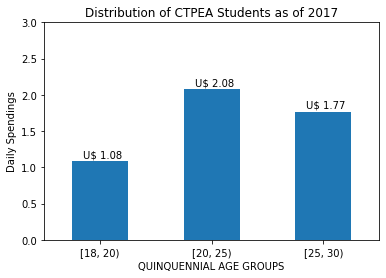

In [329]:
plott_bar(age, xlabel='QUINQUENNIAL AGE GROUPS')

In [380]:
aov('daily_spending ~ Age_grp', type_=3)

               sum_sq    df         F    PR(>F)
Intercept   14.125503   1.0  6.867435  0.010571
Age_grp     10.000797   2.0  2.431058  0.094667
Residual   158.379913  77.0       NaN       NaN


In [375]:
# 95% confidence interval for proportion of students aged 20-25 years

data = df['Age'][(df.Age>=20) & (df.Age<25)]
ucb = data.count()/df['Age'].count() + 1.96*((data.count()/df['Age'].count())*(1-(data.count()/df['Age'].count()))/(len(data)))**(0.5)
lcb = data.count()/df['Age'].count() - 1.96*((data.count()/df['Age'].count())*(1-(data.count()/df['Age'].count()))/(len(data)))**(0.5)
[lcb, ucb], data.count()/df['Age'].count()

([0.5950021276788384, 0.8299978723211616], 0.7125)

**Conclusion 1:** Students who are aged 20-25 years appear to spend more than all other categories of age. This is certainly an effect of mass, because they represent between 60 to 83% of all the students. The further test we have run have detected no statistically significant difference of spendings between this group and the others, nevertheless.

__2.- SEX__

In [331]:
sex = pivot_table(['daily_spending', 'sex'], ['sex'], func='mean')
sex

,daily_spending
sex,
Femme,2.325793
Homme,1.722290


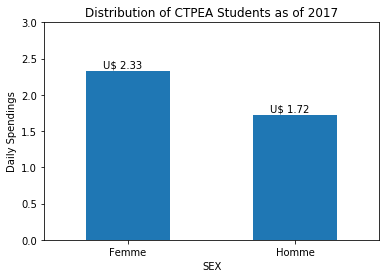

In [332]:
plott_bar(sex, xlabel='SEX')

In [394]:
aov('daily_spending ~ sex', type_=3)

               sum_sq    df          F        PR(>F)
Intercept  119.004880   1.0  57.097228  6.774294e-11
sex          5.809235   1.0   2.787207  9.902867e-02
Residual   162.571475  78.0        NaN           NaN


In [382]:
# 95%-confidence interval for proportion of women

dataf = df['sex'][(df.sex=='Femme')]
ucbf = dataf.count()/df['sex'].count() + 1.96*((dataf.count()/df['sex'].count())*(1-(dataf.count()/df['sex'].count()))/(len(dataf)))**(0.5)
lcbf = dataf.count()/df['sex'].count() - 1.96*((dataf.count()/df['sex'].count())*(1-(dataf.count()/df['sex'].count()))/(len(dataf)))**(0.5)
[lcbf, ucbf], dataf.count()/df['sex'].count()

([0.08841355890633429, 0.46158644109366576], 0.275)

**Conclusion 2:** While the proportion of women is estimated to vary between 9% and 46% at CTPEA, they still spend 61 US cents more than their men counterparts, in average. With a level of confidence up to 90%, we may consider that this difference is somewhat significant, but not beyond.

**3.- RELATIONSHIP STATUS**

In [383]:
status = pivot_table(['daily_spending', 'status'], ['status'], func='mean')
status

,daily_spending
status,
Célibataire,1.841234
en_couple,2.004780


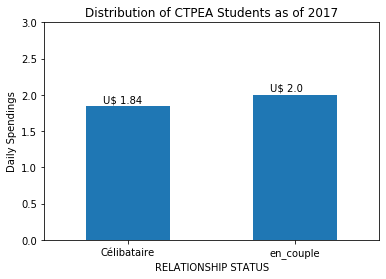

In [384]:
plott_bar(status, xlabel='RELATIONSHIP STATUS')

In [337]:
print(mean_diff(df['daily_spending'][(df.status=='Célibataire')], 
          df['daily_spending'][df.status=='en_couple']))

(-0.8776599014711415, 0.5505674895929056)
(-0.4511946752103292, 0.6531011808780728, 78.0)
None


In [391]:
aov('daily_spending ~ status')

              sum_sq    df         F    PR(>F)
status      0.438322   1.0  0.203577  0.653101
Residual  167.942388  78.0       NaN       NaN


**Conclusion 2:** Students who are in a relationship (`en_couple`) spend 16 more cents in average on a random class day than those who aren't (`Célibataire`). But we can't have any confidence that it actually impacts how different the two sub-groups of student spend on a daily basis. To further this analysis, we will try to combine both factors and see how they cross-impact on the expenses.

**4.- SEX & RELATIONSHIP STATUS**

In [338]:
status_sex = pivot_table(['daily_spending', 'status', 'sex'], ['status', 'sex'], func='mean')
status_sex

daily_spending
status      sex                  
Célibataire Femme        2.699522
            Homme        1.635991
en_couple   Femme        1.952063
            Homme        2.053104

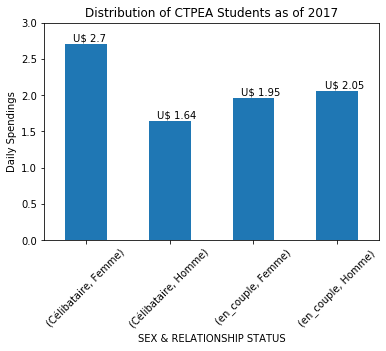

In [358]:
plott_bar(status_sex, xlabel='SEX & RELATIONSHIP STATUS', rotation=45)

In [340]:
print(mean_diff(df['daily_spending'][(df.status=='Célibataire') & (df.sex=='Femme')], 
          df['daily_spending'][(df.status=='Célibataire') & (df.sex=='Homme')]))

(-0.3330548223741896, 2.4601174299929793)
(2.199480831273976, 0.032065311828484266, 55.0)
None


In [341]:
print(mean_diff(df['daily_spending'][(df.status=='Célibataire') & (df.sex=='Homme')], 
          df['daily_spending'][(df.status=='en_couple') & (df.sex=='Femme')]))

(-1.5079003049228847, 0.8757557116914592)
(-0.6903163695661235, 0.49289816296276867, 55.0)
None


In [342]:
print(mean_diff(df['daily_spending'][(df.status=='en_couple') & (df.sex=='Femme')], 
          df['daily_spending'][(df.status=='en_couple') & (df.sex=='Homme')]))

(-1.3933111596335732, 1.1912301216605887)
(-0.16782351751523594, 0.8683278280752013, 21.0)
None


In [343]:
print(mean_diff(df['daily_spending'][(df.status=='en_couple') & (df.sex=='Homme')], 
          df['daily_spending'][(df.status=='Célibataire') & (df.sex=='Femme')]))

(-2.1241411964142562, 0.8313042199998761)
(-0.9526930939788444, 0.3515834669905127, 21.0)
None


In [388]:
aov('daily_spending ~ status*sex', type_=3)

                sum_sq    df          F        PR(>F)
Intercept    80.161635   1.0  38.597159  2.560729e-08
status        3.072822   1.0   1.479538  2.276110e-01
sex          10.040983   1.0   4.834650  3.093576e-02
status:sex    4.727333   1.0   2.276171  1.355220e-01
Residual    157.842813  76.0        NaN           NaN


**Conclusion 4:** In average, young female students who are single (`Femme, Célibataire`) spend more than all other categories on a random day: 2.70 dollars. The only other category that spends over 2 dollars is that of men who are in a relationship (`Homme, en_couple`). The category that spends less than all other categories is that of a single male student: 1.64$. However, these differences can't be considered to impact significantly on how the daily spendings vary as a whole, according to statistical tests.

**5.- YEAR**

In [395]:
year = pivot_table(['daily_spending', 'year'], ['year'], func='mean')
year

,daily_spending
year,
junior,2.093279
rookie,1.055813
senior,2.128091
sophomore,2.055061


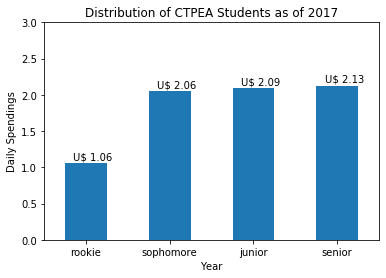

In [404]:
plott_bar(year.sort_values(by='daily_spending'), xlabel='Year')

In [406]:
aov('daily_spending ~ year')

              sum_sq    df         F    PR(>F)
year       12.842264   3.0  2.091685  0.108319
Residual  155.538446  76.0       NaN       NaN


**Conclusion 5:** The higher classes of students tend to spend slightly more than the lower. But tests have shown that the differences in spending, again, are statistically null between those different groups.

**6.- DEPARTMENT**

_At CTPEA:_
+ 1st and 2nd years are Preparatory (`prep`)
+ In 3rd year, there is an Economics and Planning Department (`eco_plan`) and a Statistics department (`stat`)
+ In 4th year, there is an Economics Department, a Planning Department and a Statistics Department (`eco`, `plan` and `stat`)

In [408]:
dep = pivot_table(['daily_spending', 'department'], ['department'], func='mean')
dep

,daily_spending
department,
eco_plan,2.213946
plan,1.174062
prep,1.736152
stat,2.251310


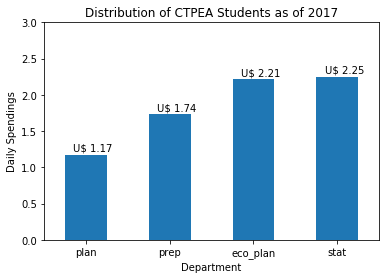

In [409]:
plott_bar(dep.sort_values(by='daily_spending'), xlabel='Department')

In [411]:
aov('daily_spending ~ department')

                sum_sq    df         F    PR(>F)
department    6.589823   3.0  1.031839  0.383386
Residual    161.790887  76.0       NaN       NaN


**Conclusion 6:** The Department that spends the most is that of Statistics and the Department that spends the less is PLanning. Although the graph shows visible differences in spending between those departments, the data doesn't allow to conclude either one is different from the others in average in terms of daily spendings.

__Conclusion:__ There are little differences between demographical categories of students in terms of daily spendings made on a random day of class at CTPEA, but none of those differences are strong enough to impact on how a student spends compared to another.

#### B. Types of spendings, sleep hours and school hours

In [473]:
aov('daily_spending ~ eat_spending + sex*pocket_money + sex*tran_spending + status*pocket_money + status*tran_spending', type_=3)

                         sum_sq    df          F        PR(>F)
Intercept              0.029883   1.0   0.055336  8.147116e-01
sex                    1.595853   1.0   2.955113  9.002595e-02
status                 0.781853   1.0   1.447793  2.329361e-01
eat_spending          44.281369   1.0  81.997798  2.093990e-13
pocket_money           5.396835   1.0   9.993562  2.321987e-03
sex:pocket_money       2.983254   1.0   5.524225  2.157828e-02
status:pocket_money    5.596072   1.0  10.362498  1.950354e-03
tran_spending          3.758812   1.0   6.960361  1.026214e-02
sex:tran_spending      5.792556   1.0  10.726336  1.644106e-03
status:tran_spending   5.290770   1.0   9.797155  2.549205e-03
Residual              37.802184  70.0        NaN           NaN


In [478]:
df.head()

,daily_spending,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,Age,sex,birth_place,status,year,department,Age_grp
0,2.962250,7.224999,8.0,7.0,0.21675,2.7455,20.0,Homme,Autre ville ou zone de province en Haiti,Célibataire,sophomore,prep,"[20, 25)"
1,1.445000,1.445000,4.3,6.0,0.14450,0.7225,19.0,Homme,Zone métropolitaine de Port-au-Prince,Célibataire,rookie,prep,"[18, 20)"
2,5.346499,14.811248,4.0,4.0,0.36125,0.7225,20.0,Femme,Zone métropolitaine de Port-au-Prince,Célibataire,sophomore,prep,"[20, 25)"
3,3.612500,7.224999,5.0,7.0,0.57800,2.8900,20.0,Homme,Autre ville ou zone de province en Haiti,Célibataire,sophomore,prep,"[20, 25)"
4,2.167500,2.890000,5.0,7.0,0.57800,1.4450,22.0,Femme,Autre ville ou zone de province en Haiti,Célibataire,junior,eco_plan,"[20, 25)"


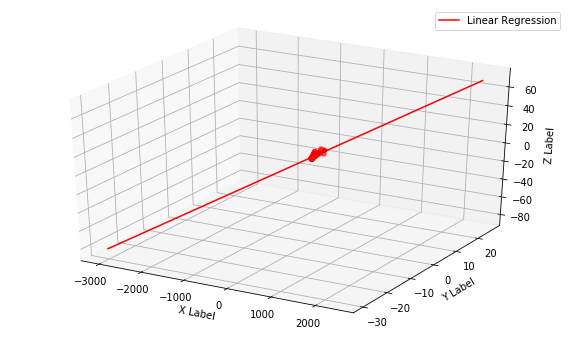

In [477]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

x = df['pocket_money']
y = df['eat_spending']
z = df['daily_spending']

ax.scatter(x,y,z, c='red')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Linear regression
X = df[['pocket_money', 'eat_spending', 'daily_spending']].values
Xlen = X.shape[0]
avgPointCloud = 1 / Xlen * np.array([np.sum(X[:, 0]), np.sum(X[:, 1]), np.sum(X[:, 2])])
Xmean = X - avgPointCloud

cov = 1 / Xlen * X.T.dot(Xmean)

t = np.arange(-5, 5, 1)
linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

ax.plot(linearReg[:, 0], linearReg[:, 1], linearReg[:, 2], 'r', label='Linear Regression')
ax.legend()

plt.show()

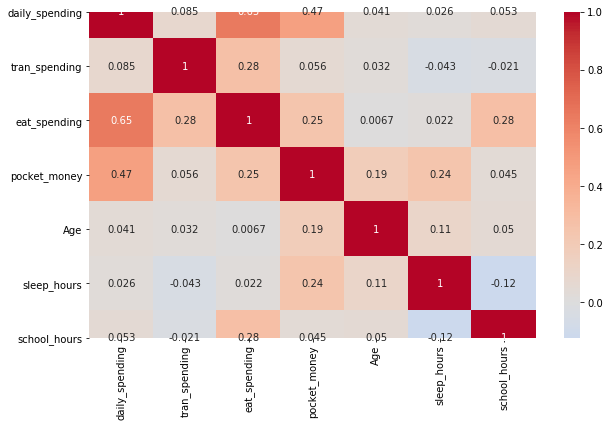

In [452]:
import seaborn as sns
plt.figure(figsize=(10,6))
ax = sns.heatmap(df[list_var].corr(), center=0, cmap='coolwarm', annot=True)
plt.show()

In [425]:
help(sns.regplot)

Help on function regplot in module seaborn.regression:

regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model. See the :ref:`tutorial <regression_tutorial>` for more
    information.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-form") dataframe where each column is a variable and each
  

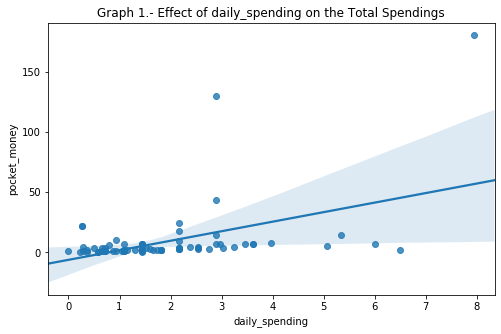

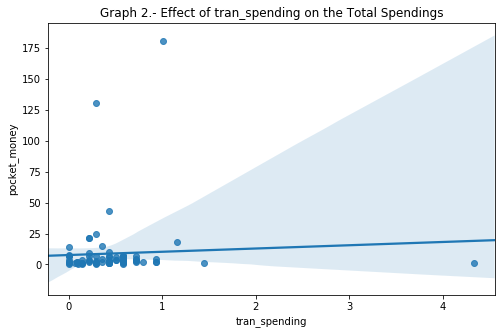

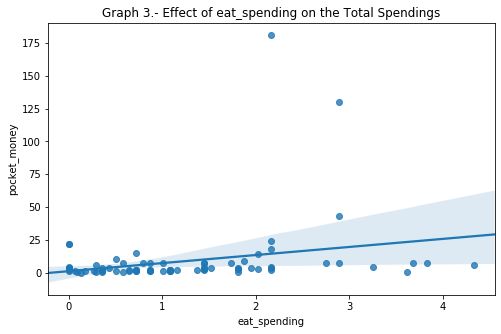

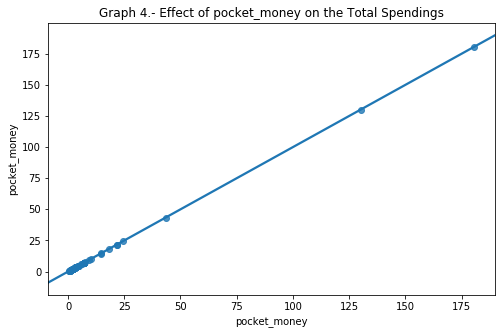

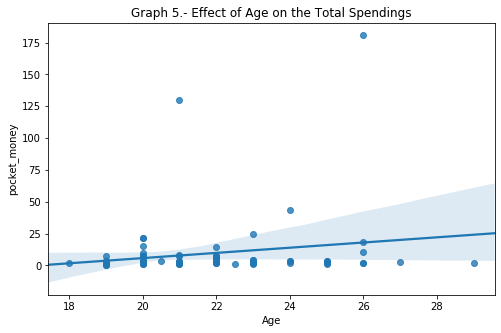

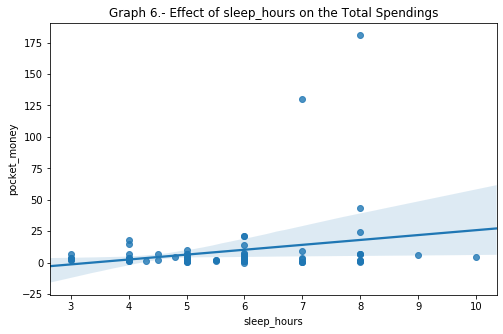

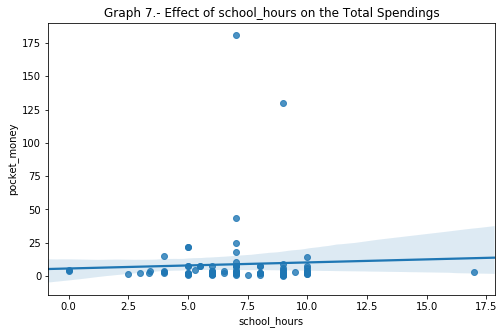

In [448]:
import seaborn as sns
def plot_scatter(x, y='pocket_money'):
    plt.figure(figsize=(8,5))
    sns.regplot(x=x, y=y, data=df)
    
list_var = ['daily_spending', 'tran_spending', 'eat_spending', 'pocket_money', 'Age', 'sleep_hours', 'school_hours']
for col in list_var:
    plot_scatter(col)
    plt.title('Graph {}.- Effect of {} on the Total Spendings'. 
              format(list_var.index(col)+1,col))

Here we are trying to see whether there might be any relationship between the duration of sleep the night before and the daily spendings. 

In [241]:
df.head()

,daily_spending,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,Age,sex,birth_place,status,year,department,Age_grp
0,2.962250,7.224999,8.0,7.0,0.21675,2.7455,20.0,Homme,Autre ville ou zone de province en Haiti,Célibataire,sophomore,prep,"[20, 25)"
1,1.445000,1.445000,4.3,6.0,0.14450,0.7225,19.0,Homme,Zone métropolitaine de Port-au-Prince,Célibataire,rookie,prep,"[18, 20)"
2,5.346499,14.811248,4.0,4.0,0.36125,0.7225,20.0,Femme,Zone métropolitaine de Port-au-Prince,Célibataire,sophomore,prep,"[20, 25)"
3,3.612500,7.224999,5.0,7.0,0.57800,2.8900,20.0,Homme,Autre ville ou zone de province en Haiti,Célibataire,sophomore,prep,"[20, 25)"
4,2.167500,2.890000,5.0,7.0,0.57800,1.4450,22.0,Femme,Autre ville ou zone de province en Haiti,Célibataire,junior,eco_plan,"[20, 25)"


In [161]:
dum.corr()

,daily_spending,pocket_money,sleep_hours,school_hours,tran_spending,eat_spending,Age,Male,born_in_AMP,en_couple,junior,freshman,senior,sophomore,eco_plan,plan,prep,stat
daily_spending,1.000000,0.467094,0.025662,0.052600,0.084645,0.647263,0.041071,-0.185743,-0.230818,0.051021,0.087037,-0.275639,0.066007,0.093879,0.103395,-0.112937,-0.125119,0.120216
pocket_money,0.467094,1.000000,0.243774,0.045445,0.055617,0.250480,0.188059,-0.062969,-0.030849,0.064755,0.046156,-0.116228,0.255631,-0.129163,0.094210,-0.061979,-0.220690,0.221242
sleep_hours,0.025662,0.243774,1.000000,-0.121156,-0.043003,0.021544,0.108496,0.110205,-0.020934,-0.012229,0.043611,-0.147500,0.299273,-0.132608,-0.028283,0.145331,-0.248911,0.260324
school_hours,0.052600,0.045445,-0.121156,1.000000,-0.021493,0.284718,0.050076,0.175567,-0.310285,0.013242,0.155622,-0.103060,-0.297171,0.149167,0.011084,-0.099738,0.066731,-0.039263
tran_spending,0.084645,0.055617,-0.043003,-0.021493,1.000000,0.278444,0.031800,0.139429,0.182923,-0.044046,-0.069472,0.143221,0.173665,-0.172866,-0.002626,0.154074,-0.058474,-0.009726
eat_spending,0.647263,0.250480,0.021544,0.284718,0.278444,1.000000,0.006677,-0.000795,-0.348986,0.129779,0.098196,-0.183284,0.012257,0.047910,0.079495,-0.049929,-0.097641,0.073642
Age,0.041071,0.188059,0.108496,0.050076,0.031800,0.006677,1.000000,0.284511,-0.061063,-0.178012,0.417529,-0.426222,0.462317,-0.365961,0.337235,0.297754,-0.702121,0.390997
Male,-0.185743,-0.062969,0.110205,0.175567,0.139429,-0.000795,0.284511,1.000000,-0.040605,-0.289164,0.065831,0.152413,0.164615,-0.297148,-0.011051,0.141293,-0.174865,0.152413
born_in_AMP,-0.230818,-0.030849,-0.020934,-0.310285,0.182923,-0.348986,-0.061063,-0.040605,1.000000,0.122250,-0.015402,0.084094,0.098942,-0.122513,0.054298,0.109007,-0.055245,-0.044049
en_couple,0.051021,0.064755,-0.012229,0.013242,-0.044046,0.129779,-0.178012,-0.289164,0.122250,1.000000,0.103604,-0.092872,-0.173430,0.101477,0.070869,-0.145730,0.027350,-0.022112


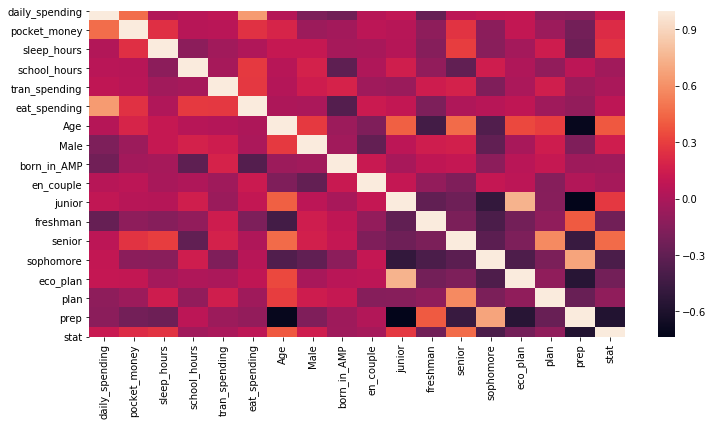

In [160]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
sns.heatmap(dum.corr())

ValueError: shape mismatch: objects cannot be broadcast to a single shape

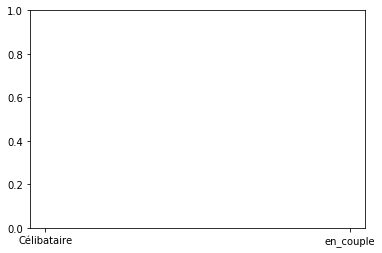

In [186]:
plt.bar(df['status'], [dum['en_couple'].mean(), 1-dum['en_couple'].mean()])

In [179]:
df['tran_spending'][df.status=='en_couple'].max()

1.1559998705280146